In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pickle as pkl

## Importing Data

In [61]:
df = pd.read_csv("../data/troop_movements.csv")
df

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2025-07-09 09:16:19,1,tie_fighter,resistance,5,4,6,9,Chandrila
1,2025-07-09 09:16:18,2,at-st,resistance,3,4,5,7,Socorro
2,2025-07-09 09:16:17,3,resistance_soldier,empire,7,2,3,3,Champala
3,2025-07-09 09:16:16,4,tie_fighter,resistance,5,8,10,3,Dathomir
4,2025-07-09 09:16:15,5,unknown,resistance,7,8,6,10,Tholoth
...,...,...,...,...,...,...,...,...,...
995,2025-07-09 08:59:44,996,at-at,resistance,5,9,9,4,Socorro
996,2025-07-09 08:59:43,997,at-at,resistance,6,7,4,1,Trandosha
997,2025-07-09 08:59:42,998,tie_fighter,empire,8,7,10,4,Ojom
998,2025-07-09 08:59:41,999,tie_fighter,resistance,8,1,8,9,Cerea


## Visualize Data

In [72]:
features = ['homeworld', 'unit_type']

In [62]:
df.groupby('empire_or_resistance').size().reset_index(name='counts')

,empire_or_resistance,counts
0,empire,517
1,resistance,483


In [63]:
df.groupby('homeworld').size().reset_index(name='counts')

,homeworld,counts
0,Alderaan,21
1,Aleen Minor,16
2,Bestine IV,25
3,Cerea,21
4,Champala,25
5,Chandrila,21
6,Concord Dawn,15
7,Corellia,27
8,Dagobah,24
9,Dathomir,21


In [64]:
df.groupby('unit_type').size().reset_index(name='counts')

,unit_type,counts
0,at-at,117
1,at-st,111
2,resistance_soldier,125
3,stormtrooper,128
4,tie_fighter,150
5,tie_silencer,117
6,unknown,147
7,x-wing,105


In [65]:
df = df[df['unit_type'] != 'unknown']
df

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2025-07-09 09:16:19,1,tie_fighter,resistance,5,4,6,9,Chandrila
1,2025-07-09 09:16:18,2,at-st,resistance,3,4,5,7,Socorro
2,2025-07-09 09:16:17,3,resistance_soldier,empire,7,2,3,3,Champala
3,2025-07-09 09:16:16,4,tie_fighter,resistance,5,8,10,3,Dathomir
6,2025-07-09 09:16:13,7,resistance_soldier,resistance,4,10,8,9,Umbara
...,...,...,...,...,...,...,...,...,...
995,2025-07-09 08:59:44,996,at-at,resistance,5,9,9,4,Socorro
996,2025-07-09 08:59:43,997,at-at,resistance,6,7,4,1,Trandosha
997,2025-07-09 08:59:42,998,tie_fighter,empire,8,7,10,4,Ojom
998,2025-07-09 08:59:41,999,tie_fighter,resistance,8,1,8,9,Cerea


In [66]:
df['is_resistance'] = df['empire_or_resistance'] == 'resistance'
df

C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_6452\3056703352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_resistance'] = df['empire_or_resistance'] == 'resistance'


,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2025-07-09 09:16:19,1,tie_fighter,resistance,5,4,6,9,Chandrila,True
1,2025-07-09 09:16:18,2,at-st,resistance,3,4,5,7,Socorro,True
2,2025-07-09 09:16:17,3,resistance_soldier,empire,7,2,3,3,Champala,False
3,2025-07-09 09:16:16,4,tie_fighter,resistance,5,8,10,3,Dathomir,True
6,2025-07-09 09:16:13,7,resistance_soldier,resistance,4,10,8,9,Umbara,True
...,...,...,...,...,...,...,...,...,...,...
995,2025-07-09 08:59:44,996,at-at,resistance,5,9,9,4,Socorro,True
996,2025-07-09 08:59:43,997,at-at,resistance,6,7,4,1,Trandosha,True
997,2025-07-09 08:59:42,998,tie_fighter,empire,8,7,10,4,Ojom,False
998,2025-07-09 08:59:41,999,tie_fighter,resistance,8,1,8,9,Cerea,True


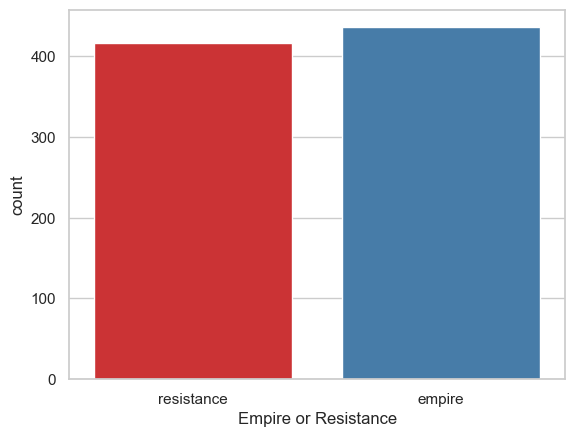

In [67]:
sns.set_theme(style='whitegrid')
sns.countplot(x = 'empire_or_resistance', data=df, palette="Set1", hue='empire_or_resistance', legend=False)
plt.xlabel('Empire or Resistance')
plt.show()

## Creating train and Test Data

In [80]:
X = df[features]
y = df['is_resistance']
X = pd.get_dummies(X)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
X_train

,homeworld_Alderaan,homeworld_Aleen Minor,homeworld_Bestine IV,homeworld_Cerea,homeworld_Champala,homeworld_Chandrila,homeworld_Concord Dawn,homeworld_Corellia,homeworld_Dagobah,homeworld_Dathomir,...,homeworld_Umbara,homeworld_Vulpter,homeworld_Zolan,unit_type_at-at,unit_type_at-st,unit_type_resistance_soldier,unit_type_stormtrooper,unit_type_tie_fighter,unit_type_tie_silencer,unit_type_x-wing
920,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
117,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
924,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
618,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
317,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
505,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


## Setting up Decision Tree Classifier

In [104]:
scores = []

for i in range(30,40):
    clf = DecisionTreeClassifier(random_state=102, max_depth=i)
    clf.fit(X=X_train, y = y_train)

    scores.append(clf.score(X=X_test, y=y_test))

In [105]:
scores

[0.6432748538011696,
 0.6608187134502924,
 0.6608187134502924,
 0.6549707602339181,
 0.6374269005847953,
 0.631578947368421,
 0.6432748538011696,
 0.6432748538011696,
 0.6432748538011696,
 0.6432748538011696]

## Calculate Feature Importance

In [125]:
importances = clf.feature_importances_
feature_importances = pd.DataFrame({'feature':X_train.columns, 'importance':importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

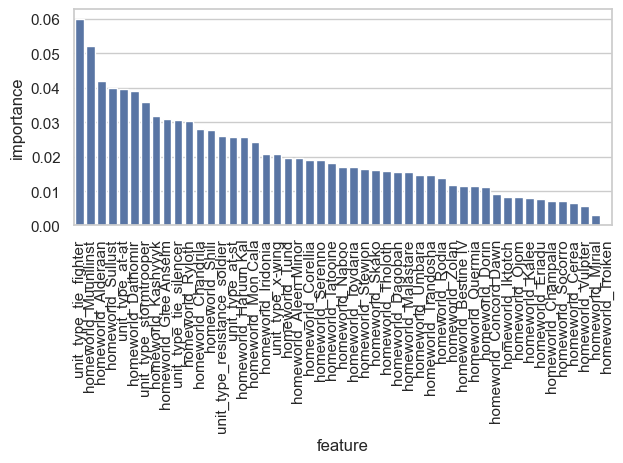

In [126]:
sns.barplot(data=feature_importances, x='feature', y='importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Export Model

In [132]:
output = "../model/clf_decision_tree.pkl"
with open(output, 'wb') as f:
    pkl.dump(clf,f)